In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from datetime import datetime, timedelta, date, time
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import pylab
import seaborn as sns
plt.style.use('seaborn')
%matplotlib inline
pylab.rcParams['figure.figsize'] = (15, 10)

## Задание 1

При проверке первого задания следует обратить внимание на следующие элементы:
1. Описанные в задании функции реализованы;
2. Тестирование проведено;
3. Код проходит тестирование в ячейке ниже, т.е. отсутствуют результаты False

In [9]:
"""Пример решения задания 1"""

def input_date_1():
    print("""Введите без пробелов дату начала расчета рабочего времени и дату окончания включительно, через запятую
             в формате год-месяц-день. Например: 2021-02-03,2021-05-31""")
    start_date, end_date = input().split(',')
    return start_date, end_date

def date_to_datetime_1(start_date, end_date):
    start_date = datetime.strptime(start_date, '%Y-%m-%d')
    end_date = datetime.strptime(end_date, '%Y-%m-%d')
    return start_date, end_date

def delta_time_1(start_date, end_date):
    delta = end_date - start_date
    delta = delta.days + 1
    return delta

def day_of_the_week_1(start_date):
    return datetime.isoweekday(start_date)

def calculating_hours_1(start_day_of_the_week, delta):
    if start_day_of_the_week == 1:
        x = delta // 7
        y = min(delta % 7, 5)
        z = 0
    else:
        x = (delta - (8 - start_day_of_the_week)) // 7
        y = min((delta - (8 - start_day_of_the_week)) % 7, 5)
        z = max(6 - start_day_of_the_week, 0)
    return 40*x + (y + z)*8

In [14]:
"""Вставьте в эту ячейку проверяемое решение"""

def input_date():
    start_date = raw_input()
    end_date = raw_input()
    return start_date, end_date
    
def date_to_datetime(start_date, end_date):
    start_date = datetime.strptime(start_date, '%Y-%m-%d')
    end_date = datetime.strptime(end_date, '%Y-%m-%d')
    return start_date, end_date

def delta_time(start_date, end_date):
    delta = end_date - start_date
    return delta.days

def day_of_the_week(start_date):
    start_day_of_the_week = datetime.isoweekday(start_date)
    return start_day_of_the_week

def calculating_hours(start_day_of_the_week, delta):
    delta -= 7 
    delta += start_day_of_the_week
    if start_day_of_the_week > 5:
        first_week = 0
    else:
        first_week = 6 - start_day_of_the_week        
    hours = 8 * (first_week + ((delta // 7) * 5) + min(delta % 7, 5))
    return hours
    

In [15]:
"""Запустите тестовую ячейку"""

def test(start_date, end_date):
    start_date, end_date = date_to_datetime(start_date, end_date)
    delta = delta_time(start_date, end_date)
    start_day_of_the_week = day_of_the_week(start_date)
    return calculating_hours(start_day_of_the_week, delta)

def test_1(start_date, end_date):
    start_date, end_date = date_to_datetime_1(start_date, end_date)
    delta = delta_time_1(start_date, end_date)
    start_day_of_the_week = day_of_the_week_1(start_date)
    return calculating_hours_1(start_day_of_the_week, delta)

time = [['2021-06-03', '2021-06-04'], ['2021-05-31', '2021-06-04'], ['2021-05-29', '2021-06-04'], 
        ['2021-05-01', '2021-06-04'], ['2001-01-01', '2021-06-04']]
for i, j in time:
    hours = test_1(i,j)
    print(i, j, hours, test(i,j), test(i,j) == hours)

('2021-06-03', '2021-06-04', 16, 16, True)
('2021-05-31', '2021-06-04', 40, 40, True)
('2021-05-29', '2021-06-04', 40, 40, True)
('2021-05-01', '2021-06-04', 200, 200, True)
('2001-01-01', '2021-06-04', 42640, 42640, True)


## Задание 2

При проверке второго задания следует обратить внимание на следующие элементы:
1. Функция *time_change()* реализована;
2. Функция *time_change()* преобразует данные согласно заданию:
    - строка *df.Order_time_sec_delta[df.Office == 0].max() == 86399* должна выдавать значение *True*;
    - строка *(df.Order_time_sec_delta - df.Order_time_sec).value_counts()* должна сообщить, что 272 элемента имеют значение 5662 (дельта смещения), а 8 значений равны -80738 (моменты, перенесенные на начало дня).

3. Функция *log_reg()* реализована;
4. Функция *log_reg()* возвращает объекты согласно заданию - для этого достаточно сравнить вывод функции *Processing_results()* в задании и реализованном примере.


Подготовка вывода результатов и данных для обработки:

In [22]:
def Processing_results(sc, lr, df, target, attribute_name, name, add_schedule = []):
    X_std = sc.transform(df[attribute_name])
    new_col_name = []
    for i, col_name in enumerate(attribute_name):
        s = col_name + '_std_' + name
        df[s] = X_std[:,i]
        new_col_name.append(s)
    y_pred = 'y_pred_' + name
    Correct = 'Correct_' + name
    df[y_pred] = lr.predict(X_std)
    df[Correct] = df.Office == df[y_pred]
    print(classification_report(df.Office, df[y_pred]))
    sns.pairplot(df[[Correct] + new_col_name], hue = Correct, height=round(12/len(new_col_name), 1))
    plt.show()
    for k in range(len(add_schedule)):
        i,j = add_schedule[k]
        i = i+'_std_'+name
        j = j+'_std_'+name
        plt.scatter(df[i][True ^ df[Correct]], df[j][True ^ df[Correct]], color = 'red')
        plt.scatter(df[i][df[Correct]], df[j][df[Correct]])
        plt.legend(['defined not correct', 'correct defined'])
        plt.xlabel(i)
        plt.ylabel(j)
        plt.show()
    return df

df = pd.read_excel('iCafe_train.xlsx')
df['Order_time_sec'] = pd.to_timedelta(df.Order_time)//np.timedelta64(1,'s')

Пример решения задания 2

In [23]:
"""Пример решения задания 2"""

def time_change(df):
    delta = 86400 - df.Order_time_sec[df.Office == 0].max() - 1
    df['Order_time_sec_delta'] = (df.Order_time_sec + delta) % 86400
    return df

def log_reg(y,X):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=21)
    sc = StandardScaler()
    sc.fit(X_train)
    X_train_std = sc.transform(X_train)
    X_test_std = sc.transform(X_test)
    lr = LogisticRegression(C=1.0, random_state=21)
    lr.fit(X_train_std, y_train)
    y_pred = lr.predict(X_test_std)
    print(classification_report(y_test, y_pred))
    return sc, lr

/goinfre/obellado/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/goinfre/obellado/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:12: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  if sys.path[0] == '':
/goinfre/obellado/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:13: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  del sys.path[0]
/goinfre/obellado/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  


              precision    recall  f1-score   support

           0       0.85      0.88      0.86        25
           1       0.93      0.91      0.92        45

   micro avg       0.90      0.90      0.90        70
   macro avg       0.89      0.90      0.89        70
weighted avg       0.90      0.90      0.90        70

              precision    recall  f1-score   support

           0       0.91      0.88      0.90        98
           1       0.94      0.96      0.95       182

   micro avg       0.93      0.93      0.93       280
   macro avg       0.93      0.92      0.92       280
weighted avg       0.93      0.93      0.93       280



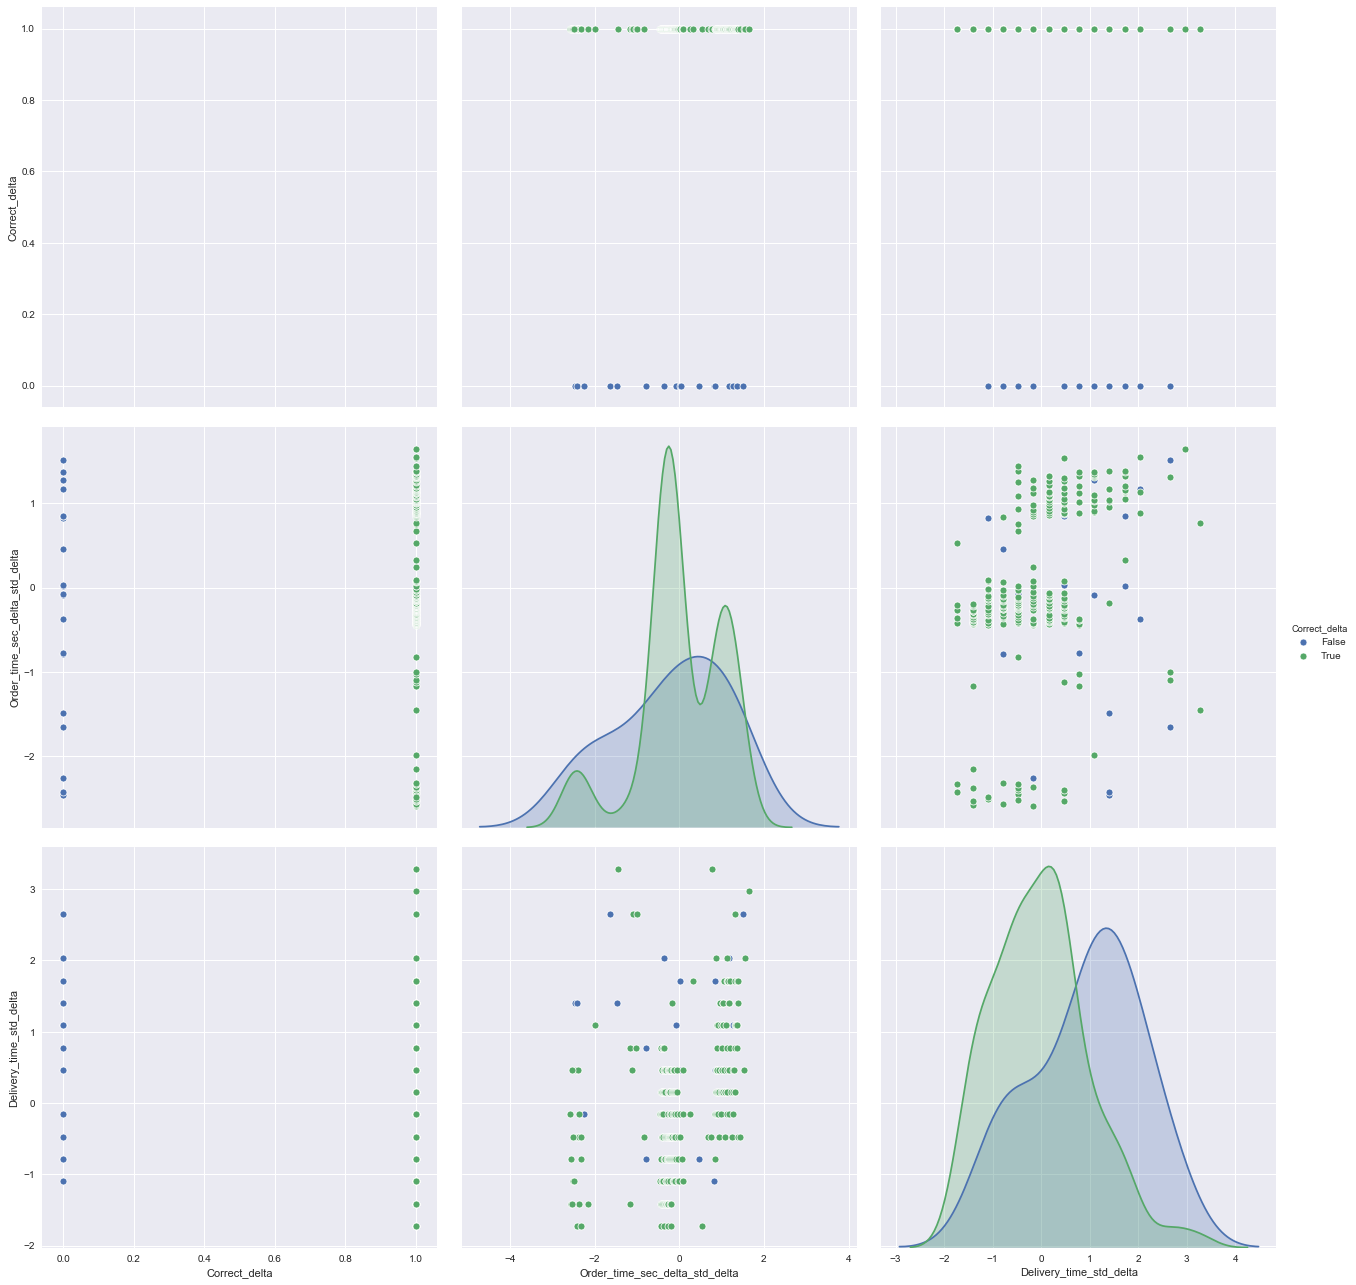

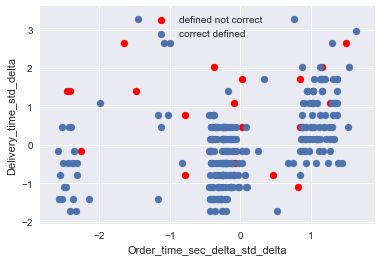

,Order_time,Delivery_time,Office,Order_time_sec,Order_time_sec_delta,Order_time_sec_delta_std_delta,Delivery_time_std_delta,y_pred_delta,Correct_delta
0,0:03:35,12,0,215,5877,-2.456039,1.403727,1,False
1,0:07:14,6,1,434,6096,-2.444885,-0.473870,1,True
2,0:11:30,9,1,690,6352,-2.431846,0.464929,1,True
3,0:13:48,12,0,828,6490,-2.424817,1.403727,1,False
4,0:14:36,2,1,876,6538,-2.422372,-1.725600,1,True
5,0:20:44,9,1,1244,6906,-2.403629,0.464929,1,True
6,0:24:29,6,1,1469,7131,-2.392169,-0.473870,1,True
7,0:31:13,3,1,1873,7535,-2.371592,-1.412668,1,True
8,0:31:47,6,1,1907,7569,-2.369860,-0.473870,1,True
9,0:34:41,7,1,2081,7743,-2.360998,-0.160937,1,True


In [24]:
"""Запустите, после написания функций"""

df = time_change(df)
y = 'Office'
x = ['Order_time_sec_delta', 'Delivery_time']
sc_delta, lr_delta = log_reg(df[y], df[x])
df = Processing_results(sc_delta, lr_delta, df, y, x, 'delta', [x])
df

In [25]:
"""Запустите, если сработала предыдущая ячейка"""

df_test = time_change(df_test)
y = 'Office'
x = ['Order_time_sec_delta', 'Delivery_time']
df_test = Processing_results(sc_delta, lr_delta, df_test, y, x, 'delta', [x])
df_test

NameError: name 'df_test' is not defined

## Задание 3

При проверке третьего задания следует обратить внимание на следующие элементы:
1. Данные преобразованы;
2. Классификатор разработан и получены результаты;
3. Проведено сравнение с результатами предыдущего классификатора:
    - Метрики качества классификаторов совпадают и на общей и на тестовой выборке;
    - Объекты неверного предсказания классификатора идентичны в обоих случаях.

## Дополнительные баллы

Вы можете дополнительно оценить работу по следующим параметрам:
1. Офформление работы, наличие комментариев, красивый вывод результатов.
2. Наличие интересных алгоритмических решений.